# Solow-model

In this project we are working with the Solow-model with human capital.
The parameters in the model are as follow:
1. $K_t$ is capital
* $H_t$ is human capital
* $L_t$ is labor
* $A_t$ is technology
* $Y_t$ is GDP


$Y_t=K_t^{\alpha}H_t^{\varphi}(A_tL_t)^{1-\alpha-\varphi}$

$K_{t-1}-K_t=s_KY_t-\delta K_t$

$H_{t-1}-H_t=s_HY_t-\delta H_t$


$s_K = \frac{Y_t}{I_t^{K}}$,
$s_H = \frac{Y_t}{I_t^{H}}$


$\tilde{k}_t = \frac{K_t}{A_{t}L_{t}}$, $\tilde{h}_t = \frac{H_t}{A_{t}L_{t}}$

$\tilde{y}_t = \tilde{k}_t^{\alpha}\tilde{h}_t^{\varphi}$


Transitions equation:

$\tilde{k}_{t+1} = \frac{1}{(1+n)(1+g)}(s_K \tilde{k}_t^{\alpha}\tilde{h}_t^{\varphi}+(1-\delta)\tilde{k}_t)$

$\tilde{h}_{t+1} = \frac{1}{(1+n)(1+g)}(s_H \tilde{k}_t^{\alpha}\tilde{h}_t^{\varphi}+(1-\delta)\tilde{h}_t)$

In [15]:
import numpy as np
import matplotlib.pyplot as plt
def solow_equation(k,h,alpha,phi,delta,sK,sH,n,g):
    """ calculate capital and human capital in the next-period
        
    Args:
    
        k (float): capital in this period
        h (float): human capital in this period
        alpha (float): Parameter wrt. capital, empirical around 1/3
        phi (float) = Parameter wrt. human capital, empirical around 1/3
        delta (float): depreciation rate
        sK (float): saving rate wrt. capital
        sH (float): saving rate wrt. human capital
        n (float): growth in population
        g (float): growth in technology
    
    Returns:
    
        k_plus (float): capital in next period
        h_plus (float): human capital in next period
        
    """
    
    k_plus = (1/(1+n)*(1+g)) *(sK * k**(alpha) * h**(phi) + (1-delta)*k)    
    h_plus = (1/(1+n)*(1+g)) *(sH * k**(alpha) * h**(phi) + (1-delta)*h)
    
    return k_plus, h_plus
   


In [16]:
solow_equation(8,8,0.3,0.3,0.95,0.5,0.5,500,500)

(2.141101126592248, 2.141101126592248)

In [32]:
def simulate_solow_model(k0,h0,alpha,phi,delta,sK,sH,n,g,T):
    """ simulate the solow model
        
    Args:
    
        k0 (float): initial level of kapital
        h (float): initial level of kapital
        alpha (float): Parameter wrt. capital, empirical around 1/3
        phi (float) = Parameter wrt. human capital, empirical around 1/3
        delta (float): depreciation rate
        sK (float): saving rate wrt. capital
        sH (float): saving rate wrt. human capital
        n (float): growth in population
        g (float): growth in technology
        T (int): number of periods to simulate
    
    Returns:
    
        k_path (list): capital path (length T)
     
        
    """
    
    # a. initialize
    k_path = [k0]
    h_path = [h0]
   
    
    # b. simulate forward
    for t in range(1,T):
        
        # i. apply solow equation
        k_plus = solow_equation(k_path[t-1],h_path[t-1],alpha,phi,delta,sK,sH,n,g)[0]  
        h_plus = solow_equation(k_path[t-1],h_path[t-1],alpha,phi,delta,sK,sH,n,g)[1] 
        
        # ii. save result
        k_path.append(k_plus)
        h_path.append(h_plus)
        
    return k_path, h_path


In [53]:
simulate_solow_model(1,1,0.3,0.3,0.05,0.15,0.05,0.05,0,15)

([1,
  1.0476190476190474,
  1.0906056888883542,
  1.1292366800125042,
  1.163798253744576,
  1.1945784094085616,
  1.221861294870178,
  1.2459231762969947,
  1.267029618824179,
  1.285433592770345,
  1.3013742870964131,
  1.3150764617113937,
  1.3267502079035327,
  1.3365910149562905,
  1.3447800632220408],
 [1,
  0.9523809523809523,
  0.9092646325017114,
  0.8701674006981176,
  0.8346636229871621,
  0.8023778775666841,
  0.7729783561081279,
  0.746171244410584,
  0.7216959139217166,
  0.6993207902231062,
  0.6788397906207171,
  0.6600692429601316,
  0.642845213368019,
  0.6270211829506677,
  0.6124660233600221])

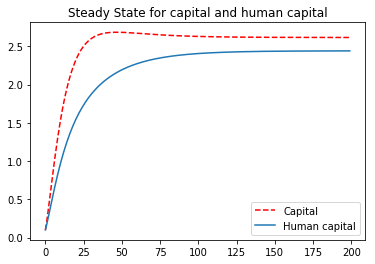

In [49]:
k0 =0.1
h0 =0.1
alpha = 0.3
phi = 0.3
delta = 0.05
sK = 0.15
sH = 0.14
n = 0.05
g = 0
T = 200

k_path = simulate_solow_model(k0,h,alpha,phi,delta,sK,sH,n,g,T)[0]
h_path = simulate_solow_model(k,h0,alpha,phi,delta,sK,sH,n,g,T)[1]


fig = plt.figure()
ax = fig.add_subplot(1,1,1)


ax.plot(k_path[:T],'r--',label="Capital")
ax.plot(h_path[:T], label="Human capital")
plt.legend()
plt.title("Steady State for capital and human capital")
plt.show()